### Import statements

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Plot customization: Arranging Multiple Axes in a Figure ([Docs](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html)) 

It is often the case that more than one Axes are required in a figure and usually they are organized into a regular grid.

Matplotlib uses Axes to refer to the drawing area that contains data, x- and y-axis, ticks, labels, title, etc. Another term that is often used is "subplot", which refers to an Axes that is in a grid with other Axes objects.

The functions most commonly used for creating a grid of Axes objects are the `fig.subplots()` and `fig.subplot_mosaic()` functions. 

- The subplots creates and places all Axes on the figure at once, and returns an object array with handles for the Axes in the grid. See [Figure.subplots](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.subplots) for more detailed function documentation.

- The subplot_mosaic function is a simple way to create figures and a grid of Axes, with the added flexibility that Axes can also span rows or columns. The Axes are returned in a labelled dictionary instead of an array. See [Figure.subplot_mosaic](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.subplot_mosaic) for more detailed function documentation.

For creating complex grid layouts we should use the `subplot_mosaic()` function.

> The `subplot_mosaic(mosaic, *, sharex=False, sharey=False, width_ratios=None, height_ratios=None, empty_sentinel='.', subplot_kw=None, per_subplot_kw=None, gridspec_kw=None)` function

The function builds a layout of Axes based on ASCII art or nested lists.

<u> Function Parameters</u>

- mosaic: A visual layout of how you want your Axes to be arranged labeled as strings.
    - the layout can be a list of strings or a list of list of strings. think of it like a 2D matrix. For example -- 
        
            x = [['A panel', 'A panel', 'edge'],
                ['C panel', '.',       'edge']] 
            
        produces 4 Axes:
        
        - 'A panel' which is 1 row high and spans the first two columns

        - 'edge' which is 2 rows high and is on the right edge

        - 'C panel' which is 1 row and 1 column wide in the bottom left

        - a blank space which is 1 row and 1 column wide in the bottom center

    Also, any of the entries in the layout can be a list of lists of the same form to create nested layouts.

    - if input is a str, then it can either be a multi-line string of the form --

            '''
            AAE
            C.E
            '''

    where each character is a column and each line is a row. Or it can be a single-line string where rows are separated by semi-colons (;) --

            'AB;CC'

    **Note:** The string notation allows only single character Axes labels and does not support nesting but is very terse.

- sharex, shareybool (default: False): If True, the x-axis (sharex) or y-axis (sharey) will be shared among all subplots. 

- width_ratios (optional): array-like of length ncols. Defines the relative widths of the columns. Each column gets a relative width of width_ratios[i] / sum(width_ratios). If not given, all columns will have the same width. In the case of nested layouts, this argument applies only to the outer layout.

- height_ratios (optional): array-like of length nrows. Defines the relative heights of the rows. Each row gets a relative height of height_ratios[i] / sum(height_ratios). If not given, all rows will have the same height. In the case of nested layouts, this argument applies only to the outer layout.

**Returns:** dict[label, Axes]. A dictionary mapping the labels to the Axes objects. The order of the axes is left-to-right and top-to-bottom of their position in the total layout.

In [8]:
# a function to put text on an Axes
def annotate_axes(axes, text):
    return axes.text(x=0.5, y=0.5, s=text, horizontalalignment='center', verticalalignment='center')

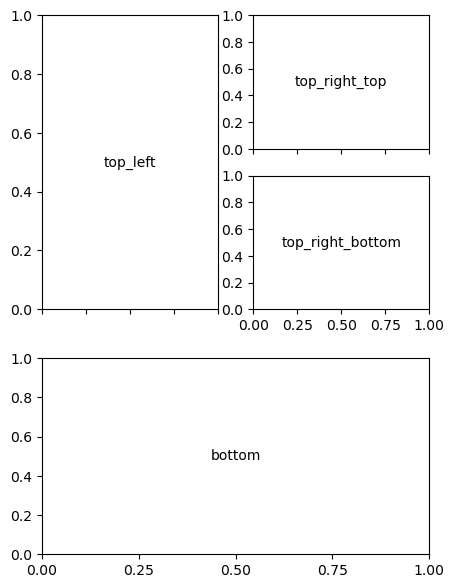

In [9]:
inner_layout = [["top_right_top"],
                ["top_right_bottom"]]
outer_layout = [["top_left", inner_layout],
                ["bottom", "bottom"]]

axd = plt.figure(figsize=(5, 7)).subplot_mosaic(mosaic=outer_layout, height_ratios=[3, 2], sharex=True, sharey=True)

for ax_names, axes in axd.items():
    annotate_axes(axes, ax_names)

In [10]:
axd

{'top_left': <Axes: label='top_left'>,
 'top_right_top': <Axes: label='top_right_top'>,
 'top_right_bottom': <Axes: label='top_right_bottom'>,
 'bottom': <Axes: label='bottom'>}

## Sub-figure ([Docs](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.SubFigure))

Sometimes it is natural to have more than one distinct group of Axes grids, in which case Matplotlib has the concept of SubFigure:

SubFigure: A virtual figure within a figure.

